In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read Training Images, Testing Images, Training Labels, Testing Labels
train = np.array([plt.imread('Data/Train/'+str(i)+'.jpg').reshape(-1) for i in range (1,2401)])
test = np.array([plt.imread('Data/Test/'+str(i)+'.jpg').reshape(-1) for i in range (1,201)])
train_labels = np.loadtxt('Data/Train/Training Labels.txt')
test_labels = np.loadtxt('Data/Test/Test Labels.txt')
print(train.shape, test.shape)
print(train_labels.shape,test_labels.shape)

(2400, 784) (200, 784)
(2400,) (200,)


## Quantize Images

In [3]:
def quantize(img,lower_bound,upper_bound,quantization_level):
    factor=((upper_bound -lower_bound)+1) / quantization_level 
    for i in range(0,quantization_level):
        img=np.where( ((factor * (i+1)) < img) | (img < (factor*i)), img, factor*i)
    return img

## Compute Naive Bayes

In [4]:
per_quantization_level=[]
for q in range(1,9):

    train_quantized = np.array([quantize(train[i], 0, 255, 2**q) for i in range (0,2400)])
    test_quantized = np.array([quantize(test[i], 0, 255, 2**q) for i in range (0,200)])
    probabilities_per_image=[]

    for t in range(0,200):
        probabilities=[0,0,0,0,0,0,0,0,0,0]
        
        for i in range (0,10):
            list_prob = np.zeros((784,))
            probabaility_x=1
            for j in range(0,240): 
                list_prob += test_quantized[t]==train_quantized[i*240+j]
            list_prob = list_prob/240
            probabilities[i]=np.prod(list_prob)
        probabilities_per_image.append(probabilities)
    per_quantization_level.append(probabilities_per_image)

In [5]:
predictions_list  = [np.argmax(per_quantization_level[i],axis=1).reshape(10,20) for i in range(0,8)]

In [6]:
# Make sure you return these two lists
list_of_confusion_matrices =[ np.array([[len(list(filter(lambda x: x==j, predictions_list[q][i]))) for j in range(0,10)] for i in range(0,10)]) for q in range(0,8)]
list_of_accuracies = [ np.trace(list_of_confusion_matrices[q])/200  for q in range(0,8)]

## Plot confusion matrices and accuracy for each quantization level 


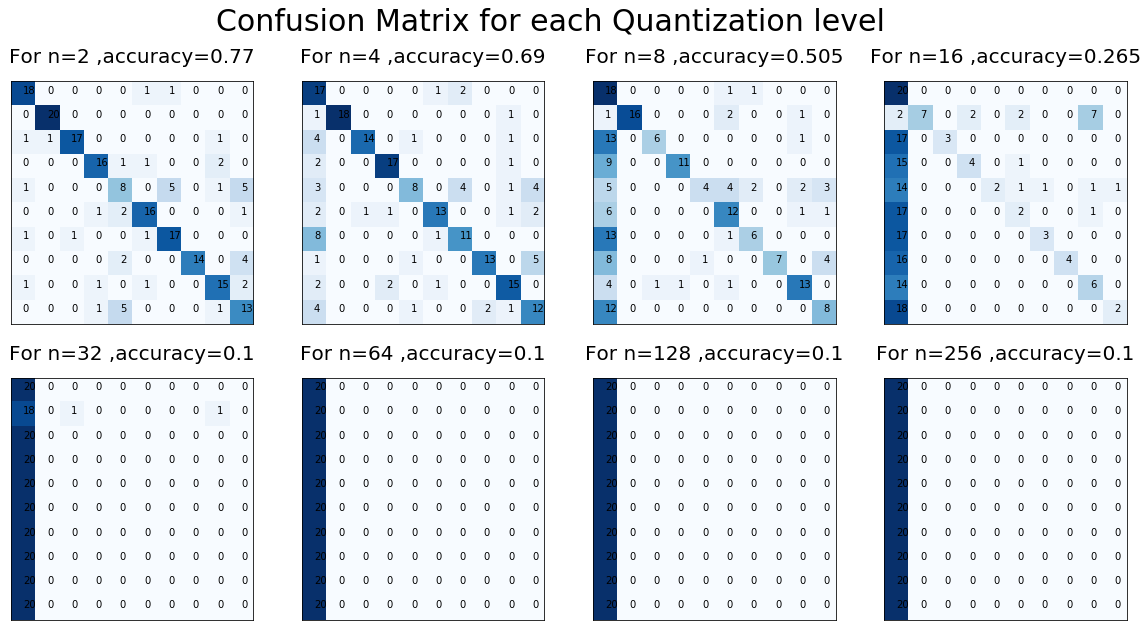

In [7]:
bits = [2,4,8,16,32,64,128,256]
confusion_matrices = list_of_confusion_matrices
accuracies = list_of_accuracies

fig, axs = plt.subplots(2, 4,figsize=(20,10))
fig.suptitle("Confusion Matrix for each Quantization level",fontsize=30)
for pi in range(0,axs.shape[0]):
    for pj in range(0,axs.shape[1]):
        index = np.round(pi*4+pj)
        cm = confusion_matrices[index]
        axs[pi,pj].matshow(cm,cmap="Blues")
        for i in range(0,cm.shape[0]):
            for j in range(0,cm.shape[1]):
                axs[pi,pj].set_xticks([])
                axs[pi,pj].set_yticks([])
                axs[pi,pj].annotate(cm[i,j],(j,i))
                axs[pi,pj].set_title("For n="+str(bits[index])+" ,accuracy="+str(accuracies[index]),fontsize=20)
fig.savefig("./Results/confusion_matrices")

## Plot accuracy levels for each quantization level


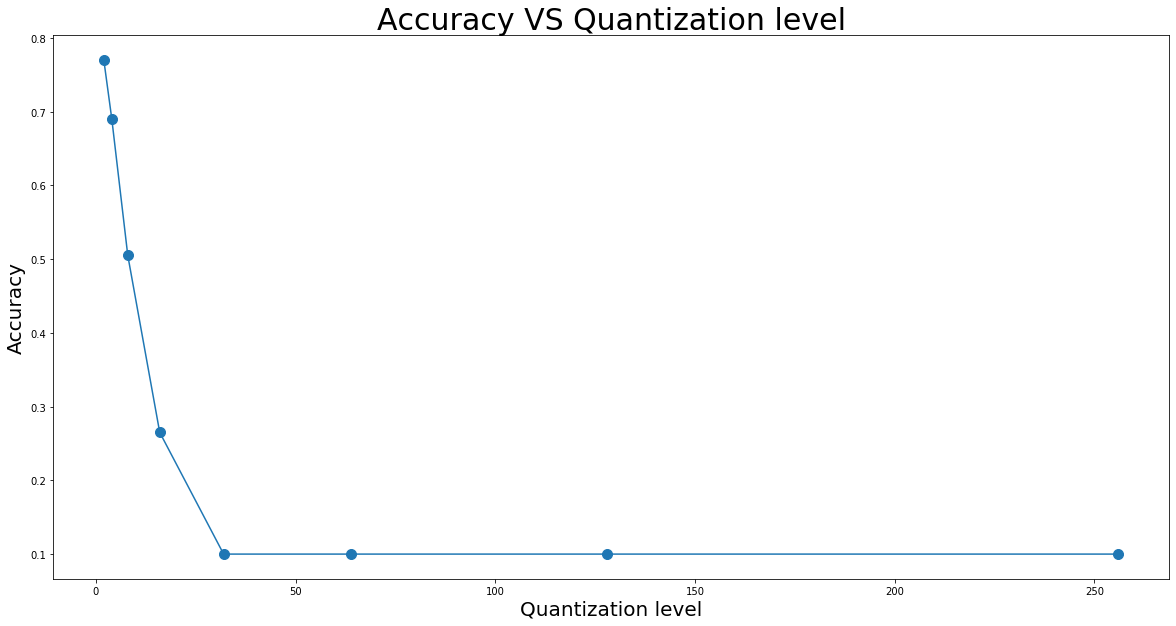

In [8]:
plt.rc('figure', figsize=[20,10])
plt.title("Accuracy VS Quantization level",fontsize=30)
plt.xlabel("Quantization level",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.plot(bits,accuracies,marker='o',markersize=10)
plt.savefig("./Results/accuracy_vs_quantization")

## Compute Naive Bayes (replace probabilities of 0 with value in assignment)

In [9]:
per_quantization_level=[]
for q in range(1,9):

    train_quantized = np.array([quantize(train[i], 0, 255, 2**q) for i in range (0,2400)])
    test_quantized = np.array([quantize(test[i], 0, 255, 2**q) for i in range (0,200)])
    probabilities_per_image=[]

    for t in range(0,200):
        probabilities=[0,0,0,0,0,0,0,0,0,0]
        
        for i in range (0,10):
            list_prob = np.zeros((784,))
            probabaility_x=1
            for j in range(0,240): 
                list_prob += test_quantized[t]==train_quantized[i*240+j]
            list_prob = list_prob/240
            list_prob = np.where( (list_prob > 0), list_prob ,  0.00001)
            probabilities[i]=np.prod(list_prob)
        probabilities_per_image.append(probabilities)
    per_quantization_level.append(probabilities_per_image)

In [10]:
predictions_list  = [np.argmax(per_quantization_level[i],axis=1).reshape(10,20) for i in range(0,8)]

In [11]:
list_of_confusion_matrices =[ np.array([[len(list(filter(lambda x: x==j, predictions_list[q][i]))) for j in range(0,10)] for i in range(0,10)]) for q in range(0,8)]
list_of_accuracies = [ np.trace(list_of_confusion_matrices[q])/200  for q in range(0,8)]

## Plot confusion matrices and accuracy for each quantization level 

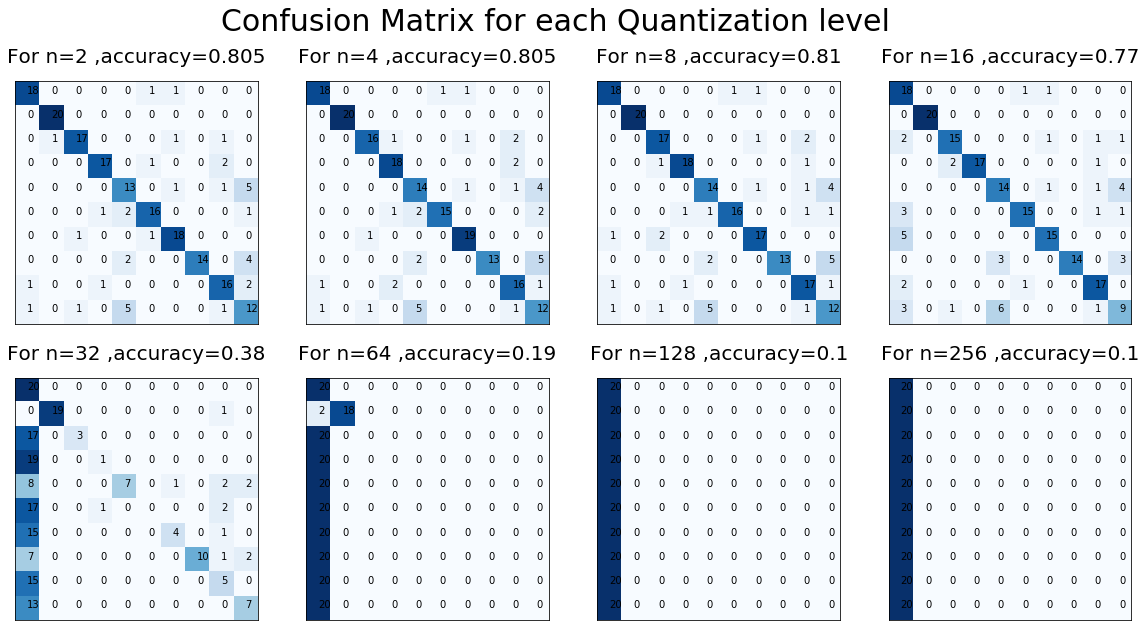

In [12]:
bits = [2,4,8,16,32,64,128,256]
confusion_matrices = list_of_confusion_matrices
accuracies = list_of_accuracies

fig, axs = plt.subplots(2, 4,figsize=(20,10))
fig.suptitle("Confusion Matrix for each Quantization level",fontsize=30)
for pi in range(0,axs.shape[0]):
    for pj in range(0,axs.shape[1]):
        index = np.round(pi*4+pj)
        cm = confusion_matrices[index]
        axs[pi,pj].matshow(cm,cmap="Blues")
        for i in range(0,cm.shape[0]):
            for j in range(0,cm.shape[1]):
                axs[pi,pj].set_xticks([])
                axs[pi,pj].set_yticks([])
                axs[pi,pj].annotate(cm[i,j],(j,i))
                axs[pi,pj].set_title("For n="+str(bits[index])+" ,accuracy="+str(accuracies[index]),fontsize=20)
fig.savefig("./Results/Replace_0_confusion_matrices")

## Plot accuracy levels for each quantization level (Don't edit)

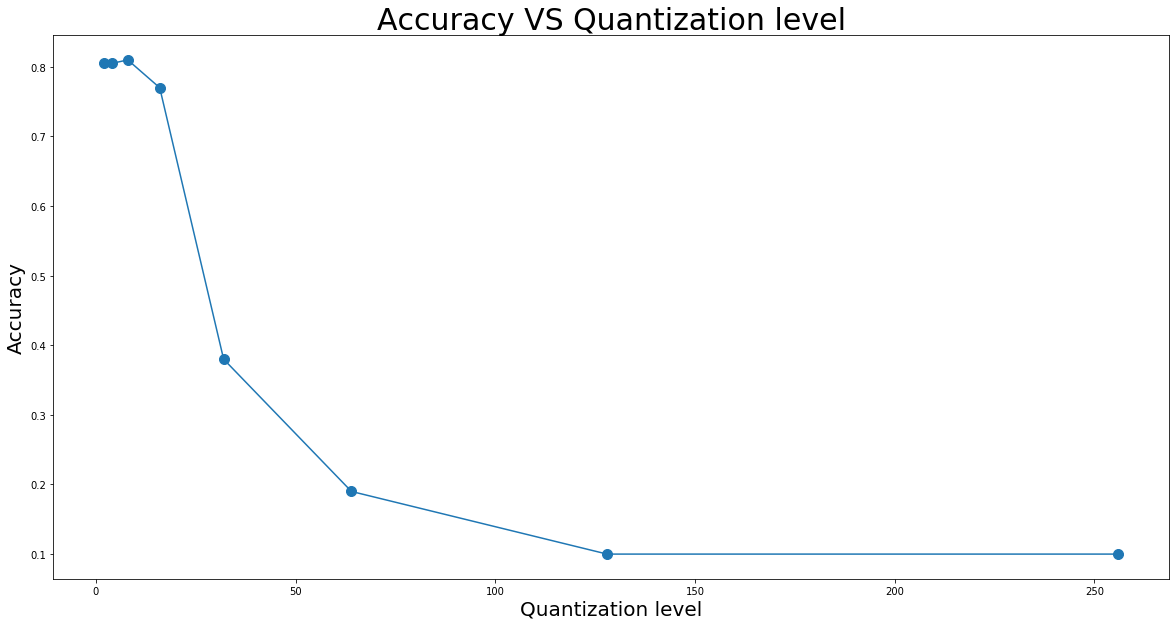

In [13]:
# PLEASE DON'T EDIT THIS CELL
plt.rc('figure', figsize=[20,10])
plt.title("Accuracy VS Quantization level",fontsize=30)
plt.xlabel("Quantization level",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.plot(bits,accuracies,marker='o',markersize=10)
plt.savefig("./Results/Replace_0_accuracy_vs_quantization")